In [186]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"


# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

Mouse_ID = clinical_trial_data['Mouse ID']
Drug = []
for ID in Mouse_ID:
    m_Drug = np.array(mouse_drug_data.loc[ mouse_drug_data['Mouse ID']==ID,'Drug'])
    Drug.append(m_Drug[0])

clinical_labels = list(clinical_trial_data)
mouse_drug_labels = list(mouse_drug_data)
merged_label = clinical_labels;
merged_label.append(mouse_drug_labels[1])

panda_Drug = pd.DataFrame(Drug,columns=['Drug'])
merged_data = pd.concat([clinical_trial_data, panda_Drug], axis=1,ignore_index=True )
merged_data.columns = merged_label


# Display the data table for preview

print('\n------------- Merged data ---------------------------------------\n')
print(merged_data.head())




------------- Merged data ---------------------------------------

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites       Drug
0     b128          0                45.0                 0  Capomulin
1     f932          0                45.0                 0   Ketapril
2     g107          0                45.0                 0   Ketapril
3     a457          0                45.0                 0   Ketapril
4     c819          0                45.0                 0   Ketapril


## Tumor Response to Treatment

In [187]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

unique_Drug = np.unique(merged_data['Drug'])
unique_Timepoint = np.unique(merged_data['Timepoint'])

Mean_Tumor_data = []
for m_Drug in unique_Drug:
    for m_Timepoint in unique_Timepoint:
        values = np.array(merged_data.loc[(merged_data['Drug'] == m_Drug) & (merged_data['Timepoint'] == m_Timepoint), merged_label[2]])
        Mean_Tumor_data.append([m_Drug, m_Timepoint, np.mean(values)])

# Convert to DataFrame
Data_Mean_Tumor = pd.DataFrame(Mean_Tumor_data, columns=['Drug','Timepoint','Tumor Volume (mm3)'])

# Preview DataFrame

print('\n------------- Mean Tumor ---------------------------------------\n')
print(Data_Mean_Tumor)


------------- Mean Tumor ---------------------------------------

         Drug  Timepoint  Tumor Volume (mm3)
0   Capomulin          0           45.000000
1   Capomulin          5           44.266086
2   Capomulin         10           43.084291
3   Capomulin         15           42.064317
4   Capomulin         20           40.716325
5   Capomulin         25           39.939528
6   Capomulin         30           38.769339
7   Capomulin         35           37.816839
8   Capomulin         40           36.958001
9   Capomulin         45           36.236114
10   Ceftamin          0           45.000000
11   Ceftamin          5           46.503051
12   Ceftamin         10           48.285125
13   Ceftamin         15           50.094055
14   Ceftamin         20           52.157049
15   Ceftamin         25           54.287674
16   Ceftamin         30           56.769517
17   Ceftamin         35           58.827548
18   Ceftamin         40           61.467895
19   Ceftamin         45         

In [188]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_Tumor_data = []
for m_Drug in unique_Drug:
    for m_Timepoint in unique_Timepoint:
        values = np.array(merged_data.loc[(merged_data['Drug'] == m_Drug) & (merged_data['Timepoint'] == m_Timepoint), merged_label[2]])
        std_Tumor_data.append([m_Drug, m_Timepoint, np.std(values)/np.sqrt(len(values)-1)])

# Convert to DataFrame
Data_std_Tumor = pd.DataFrame(std_Tumor_data, columns=['Drug','Timepoint','Tumor Volume (mm3)'])

# Preview DataFrame
print('\n------------- std Tumor ---------------------------------------\n')
print(Data_std_Tumor.head())




------------- std Tumor ---------------------------------------

        Drug  Timepoint  Tumor Volume (mm3)
0  Capomulin          0            0.000000
1  Capomulin          5            0.448593
2  Capomulin         10            0.702684
3  Capomulin         15            0.838617
4  Capomulin         20            0.909731


In [189]:
# Minor Data Munging to Re-Format the Data Frames
Re_format_data = pd.DataFrame(unique_Timepoint, columns=['Timepoint'])
for m_Drug in unique_Drug:
    values = np.array(Data_Mean_Tumor.loc[(Data_Mean_Tumor['Drug'] == m_Drug) , 'Tumor Volume (mm3)'])
    Re_format_data[m_Drug] = values


# Preview that Reformatting worked

print('\n------------- Re_format ---------------------------------------\n')
print(Re_format_data.head())


------------- Re_format ---------------------------------------

   Timepoint  Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol  \
0          0  45.000000  45.000000  45.000000  45.000000  45.000000   
1          5  44.266086  46.503051  47.062001  47.389175  46.796098   
2         10  43.084291  48.285125  49.403909  49.582269  48.694210   
3         15  42.064317  50.094055  51.296397  52.399974  50.933018   
4         20  40.716325  52.157049  53.197691  54.920935  53.644087   

     Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
0  45.000000  45.000000  45.000000  45.000000  45.000000  
1  47.125589  47.168130  43.944859  47.527452  46.851818  
2  49.423329  48.938560  42.531957  49.463844  48.689881  
3  51.359742  50.891769  41.495061  51.529409  50.779059  
4  54.364417  53.127384  40.238325  54.067395  53.170334  


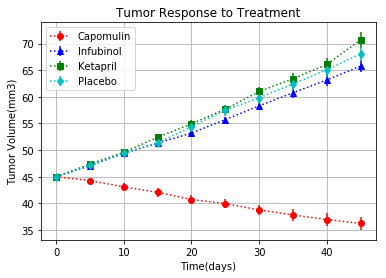

In [190]:
# Generate the Plot (with Error Bars)
plt.errorbar(Re_format_data['Timepoint'], Re_format_data[unique_Drug[0]],yerr=Data_std_Tumor.loc[(Data_std_Tumor['Drug'] == unique_Drug[0]) , 'Tumor Volume (mm3)'], fmt="ro:")
plt.errorbar(Re_format_data['Timepoint'], Re_format_data[unique_Drug[2]],yerr=Data_std_Tumor.loc[(Data_std_Tumor['Drug'] == unique_Drug[2]) , 'Tumor Volume (mm3)'], fmt="b^:")
plt.errorbar(Re_format_data['Timepoint'], Re_format_data[unique_Drug[3]],yerr=Data_std_Tumor.loc[(Data_std_Tumor['Drug'] == unique_Drug[3]) , 'Tumor Volume (mm3)'], fmt="gs:")
plt.errorbar(Re_format_data['Timepoint'], Re_format_data[unique_Drug[5]],yerr=Data_std_Tumor.loc[(Data_std_Tumor['Drug'] == unique_Drug[5]) , 'Tumor Volume (mm3)'], fmt="cd:")
plt.legend([unique_Drug[0],unique_Drug[2],unique_Drug[3],unique_Drug[5]],loc='upper left')
plt.grid()
plt.xlabel('Time(days)')
plt.ylabel('Tumor Volume(mm3)')
plt.title('Tumor Response to Treatment')
# Save the Figure
plt.savefig("Fig1.png")
plt.show()

# Save the Figure



In [198]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [192]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Mean_Met_data = []
for m_Drug in unique_Drug:
    for m_Timepoint in unique_Timepoint:
        values = np.array(merged_data.loc[(merged_data['Drug'] == m_Drug) & (merged_data['Timepoint'] == m_Timepoint), merged_label[3]])
        Mean_Met_data.append([m_Drug, m_Timepoint, np.mean(values)])


# Convert to DataFrame
Data_Mean_Met = pd.DataFrame(Mean_Met_data, columns=['Drug','Timepoint',merged_label[3]])

# Preview DataFrame
print('\n------------- Mean Met ---------------------------------------\n')
print(Data_Mean_Met.head())





------------- Mean Met ---------------------------------------

        Drug  Timepoint  Metastatic Sites
0  Capomulin          0          0.000000
1  Capomulin          5          0.160000
2  Capomulin         10          0.320000
3  Capomulin         15          0.375000
4  Capomulin         20          0.652174


In [218]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
std_Met_data = []
for m_Drug in unique_Drug:
    for m_Timepoint in unique_Timepoint:
        values = np.array(merged_data.loc[(merged_data['Drug'] == m_Drug) & (merged_data['Timepoint'] == m_Timepoint), merged_label[3]])
        std_Met_data.append([m_Drug, m_Timepoint, np.std(values)/np.sqrt(len(values)-1)])

# Convert to DataFrame
Data_std_Met = pd.DataFrame(std_Met_data, columns=['Drug','Timepoint',merged_label[3]])

# Preview DataFrame
print('\n------------- std Met ---------------------------------------\n')
print(Data_std_Met.head())


------------- std Met ---------------------------------------

        Drug  Timepoint  Metastatic Sites
0  Capomulin          0          0.000000
1  Capomulin          5          0.074833
2  Capomulin         10          0.125433
3  Capomulin         15          0.132048
4  Capomulin         20          0.161621


In [199]:
# Minor Data Munging to Re-Format the Data Frames
Met_Re_format_data = pd.DataFrame(unique_Timepoint, columns=['Timepoint'])
for m_Drug in unique_Drug:
    values = np.array(Data_Mean_Met.loc[(Data_Mean_Met['Drug'] == m_Drug), merged_label[3]])
    Met_Re_format_data[m_Drug] = values
    
# Preview that Reformatting worked

print('\n------------- Met_Re_format ---------------------------------------\n')
print(Met_Re_format_data.head())


------------- Met_Re_format ---------------------------------------

   Timepoint  Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  \
0          0   0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
1          5   0.160000  0.380952   0.280000  0.304348  0.260870  0.375000   
2         10   0.320000  0.600000   0.666667  0.590909  0.523810  0.833333   
3         15   0.375000  0.789474   0.904762  0.842105  0.857143  1.250000   
4         20   0.652174  1.111111   1.050000  1.210526  1.150000  1.526316   

   Propriva  Ramicane  Stelasyn  Zoniferol  
0  0.000000  0.000000  0.000000   0.000000  
1  0.347826  0.120000  0.240000   0.166667  
2  0.619048  0.250000  0.478261   0.500000  
3  0.800000  0.333333  0.782609   0.809524  
4  1.000000  0.347826  0.952381   1.294118  


In [ ]:
# Generate the Plot (with Error Bars)

plt.errorbar(Met_Re_format_data['Timepoint'], Met_Re_format_data[unique_Drug[0]],yerr=Data_std_Met.loc[(Data_std_Met['Drug'] == unique_Drug[0]) , merged_label[3]], fmt="ro:")
plt.errorbar(Met_Re_format_data['Timepoint'], Met_Re_format_data[unique_Drug[2]],yerr=Data_std_Met.loc[(Data_std_Met['Drug'] == unique_Drug[2]) , merged_label[3]], fmt="b^:")
plt.errorbar(Met_Re_format_data['Timepoint'], Met_Re_format_data[unique_Drug[3]],yerr=Data_std_Met.loc[(Data_std_Met['Drug'] == unique_Drug[3]) , merged_label[3]], fmt="gs:")
plt.errorbar(Met_Re_format_data['Timepoint'], Met_Re_format_data[unique_Drug[5]],yerr=Data_std_Met.loc[(Data_std_Met['Drug'] == unique_Drug[5]) , merged_label[3]], fmt="cd:")
plt.legend([unique_Drug[0],unique_Drug[2],unique_Drug[3],unique_Drug[5]],loc='upper left')
plt.grid()
plt.xlabel('Treatment Duration(Days)')
plt.ylabel(merged_label[3])
plt.title('Metastatic Spreed During Treatment')
# Save the Figure
plt.savefig("Fig2.png")
plt.show()


## Survival Rates

In [200]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

Mouse_count_data = []
for m_Drug in unique_Drug:
    for m_Timepoint in unique_Timepoint:
        values = np.array(merged_data.loc[(merged_data['Drug'] == m_Drug) & (merged_data['Timepoint'] == m_Timepoint), merged_label[2]])
        Mouse_count_data.append([m_Drug, m_Timepoint, len(values)])

        # Convert to DataFrame
Data_Mouse_count = pd.DataFrame(Mouse_count_data, columns=['Drug','Timepoint','Mouse Count'])

# Preview DataFrame
print('\n------------- Mouse_count ---------------------------------------\n')
print(Data_Mouse_count.head())



------------- Mouse_count ---------------------------------------

        Drug  Timepoint  Mouse Count
0  Capomulin          0           25
1  Capomulin          5           25
2  Capomulin         10           25
3  Capomulin         15           24
4  Capomulin         20           23


In [201]:
# Minor Data Munging to Re-Format the Data Frames
Mouse_Re_format = pd.DataFrame(unique_Timepoint, columns=['Timepoint'])
for m_Drug in unique_Drug:
    values = np.array(Data_Mouse_count.loc[(Data_Mean_Met['Drug'] == m_Drug), 'Mouse Count'])
    Mouse_Re_format[m_Drug] = values

# Preview the Data Frame

print('\n------------- Mouse Mouse Re_format ---------------------------------------\n')
print(Mouse_Re_format.head())


------------- Mouse Mouse Re_format ---------------------------------------

   Timepoint  Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol  Placebo  \
0          0         25        25         25        25        25       25   
1          5         25        21         25        23        23       24   
2         10         25        20         21        22        21       24   
3         15         24        19         21        19        21       20   
4         20         23        18         20        19        20       19   

   Propriva  Ramicane  Stelasyn  Zoniferol  
0        24        25        26         25  
1        23        25        25         24  
2        21        24        23         22  
3        15        24        23         21  
4        15        23        21         17  


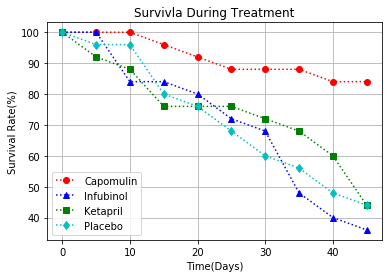

In [202]:
# Generate the Plot (Accounting for percentages)
plt.errorbar(Mouse_Re_format['Timepoint'], Mouse_Re_format[unique_Drug[0]]*100.0/np.max(np.array(Mouse_Re_format[unique_Drug[0]])), fmt="ro:")
plt.errorbar(Mouse_Re_format['Timepoint'], Mouse_Re_format[unique_Drug[2]]*100.0/np.max(np.array(Mouse_Re_format[unique_Drug[2]])), fmt="b^:")
plt.errorbar(Mouse_Re_format['Timepoint'], Mouse_Re_format[unique_Drug[3]]*100.0/np.max(np.array(Mouse_Re_format[unique_Drug[3]])), fmt="gs:")
plt.errorbar(Mouse_Re_format['Timepoint'], Mouse_Re_format[unique_Drug[5]]*100.0/np.max(np.array(Mouse_Re_format[unique_Drug[5]])), fmt="cd:")
plt.legend([unique_Drug[0],unique_Drug[2],unique_Drug[3],unique_Drug[5]],loc='lower left')
plt.grid()
plt.xlabel('Time(Days)')
plt.ylabel('Survival Rate(%)')
plt.title('Survivla During Treatment')

# Save the Figure
plt.savefig("Fig3.png")

# Show the Figure
plt.show()

In [196]:
# Calculate the percent changes for each drug
percent_change = []
for m_Drug in unique_Drug:
    values = np.array(Data_Mean_Tumor.loc[(Data_Mean_Tumor['Drug'] == m_Drug) , 'Tumor Volume (mm3)'])
    percent_change.append((values[-1]-values[0])*100.0/values[0])

Tumor_change_data = pd.DataFrame(columns=('Drug','change_percent'))
Tumor_change_data.Drug = unique_Drug;
Tumor_change_data.change_percent = percent_change;

# Display the data to confirm

print('\n------------- Tumor_change_data ---------------------------------------\n')
print(Tumor_change_data)


------------- Tumor_change_data ---------------------------------------

        Drug  change_percent
0  Capomulin      -19.475303
1   Ceftamin       42.516492
2  Infubinol       46.123472
3   Ketapril       57.028795
4   Naftisol       53.923347
5    Placebo       51.297960
6   Propriva       47.241175
7   Ramicane      -22.320900
8   Stelasyn       52.085134
9  Zoniferol       46.579751


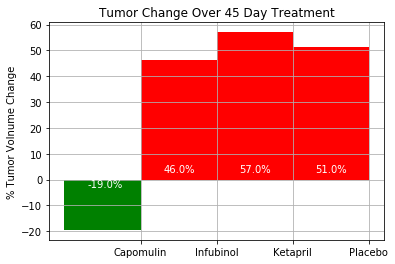

In [230]:
# Splice the data between passing and failing drugs
list_Tumor_change_data1 = list_Tumor_change_data[[0,2,3,5],:]
# Use functions to label the percentages of changes
# Orient widths. Add labels, tick marks, etc.
def plot_graph(ax, list_Tumor_change_data1):
    for n in range(len(list_Tumor_change_data1)):
        if list_Tumor_change_data1[n,1]<0:
            ax.bar(n+0.5, list_Tumor_change_data1[n, 1], width=1, color='g')
            ax.text(n+0.3, -3, str(np.round(list_Tumor_change_data1[n, 1]))+"%", size=10,color="w")
        else:
            ax.bar(n+0.5, list_Tumor_change_data1[n, 1], width=1, color='r')
            ax.text(n + 0.3, 3, str(np.round(list_Tumor_change_data1[n, 1])) + "%", size=10,color="w")

    ax.set_xticks([1, 2, 3, 4])
    ax.set_xticklabels(list_Tumor_change_data1[:, 0])
    ax.grid()
    plt.ylabel('% Tumor Volnume Change')
    plt.title('Tumor Change Over 45 Day Treatment')

    return ax

# Call functions to implement the function calls
fig,ax = plt.subplots()
ax = plot_graph(ax, list_Tumor_change_data1)

# Save the Figure
plt.savefig("Fig4.png")

# Show the Figure
fig.show()
